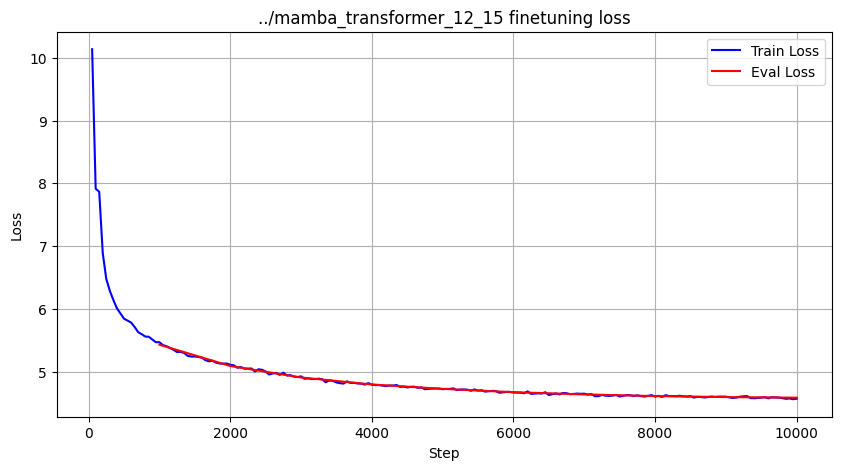

In [2]:
import os
import json
import matplotlib.pyplot as plt

root_folder = '../mamba_transformer_12_15'
checkpoint = 'checkpoint-10000'
train_losses = []
train_steps = []
eval_losses = []
eval_steps = []

json_path = os.path.join(root_folder, checkpoint, 'trainer_state.json')
if os.path.exists(json_path):
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)

        for t in data['log_history']:
            if 'eval_loss' in t:
                eval_losses.append(t['eval_loss'])
                eval_steps.append(t['step'])
            else:
                train_losses.append(t['loss'])
                train_steps.append(t['step'])

# Plotting the losses
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(train_steps, train_losses, label='Train Loss', color='blue')  # Plot training losses
plt.plot(eval_steps, eval_losses, label='Eval Loss', color='red')  # Plot evaluation losses
plt.xlabel('Step')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.title(root_folder + ' finetuning loss')  # Title of the plot
plt.legend()  # Add a legend to differentiate the lines
plt.grid(True)  # Add grid for better readability of the plot
plt.show()  # Display the plot

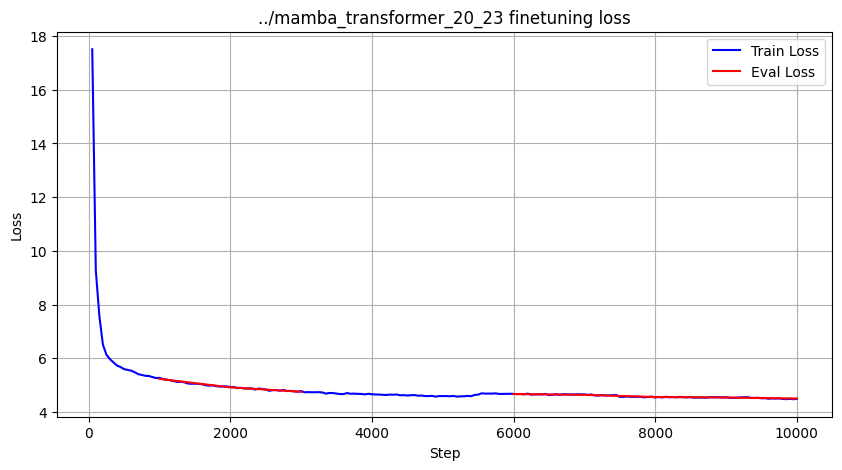

In [3]:
import os
import json
import matplotlib.pyplot as plt

root_folder = '../mamba_transformer_20_23'
checkpoint = 'checkpoint-10000'
train_losses = []
train_steps = []
eval_losses = []
eval_steps = []

json_path = os.path.join(root_folder, checkpoint, 'trainer_state.json')
if os.path.exists(json_path):
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)

        for t in data['log_history']:
            if 'eval_loss' in t:
                eval_losses.append(t['eval_loss'])
                eval_steps.append(t['step'])
            else:
                train_losses.append(t['loss'])
                train_steps.append(t['step'])

# Plotting the losses
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(train_steps, train_losses, label='Train Loss', color='blue')  # Plot training losses
plt.plot(eval_steps, eval_losses, label='Eval Loss', color='red')  # Plot evaluation losses
plt.xlabel('Step')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.title(root_folder + ' finetuning loss')  # Title of the plot
plt.legend()  # Add a legend to differentiate the lines
plt.grid(True)  # Add grid for better readability of the plot
plt.show()  # Display the plot

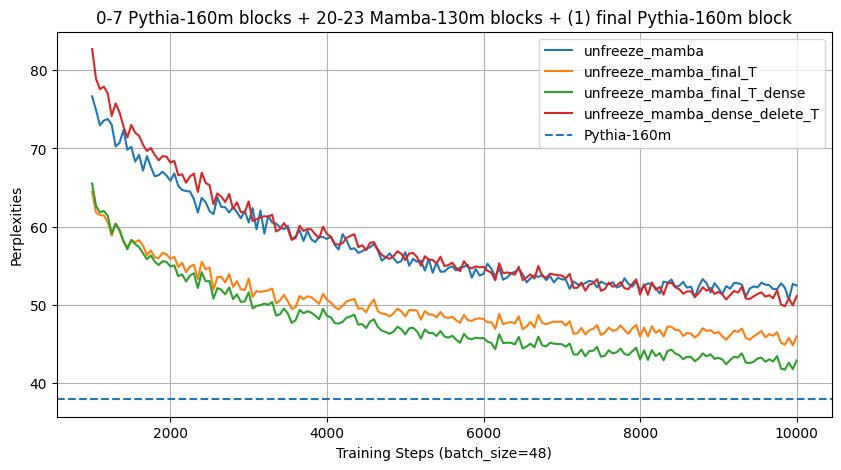

In [29]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

unfreeze_mamba_folder = '../20_23_2e-4'
unfreeze_mamba_final_T_folder = '../final_T_unfreezed_2e-4'
unfreeze_mamba_final_T_dense_folder = '../final_T_and_dense_unfreezed_2e-4'
unfreeze_mamba_dense_delete_T_folder = '../mamba_no_final_transformer_embedding_unfreezed'
connection_unfreeze_mamba_final_T_dense_folder = '../mamba_connection_and_everything_unfreezed'

folders = [unfreeze_mamba_folder, unfreeze_mamba_final_T_folder, unfreeze_mamba_final_T_dense_folder, unfreeze_mamba_dense_delete_T_folder]
names = ['unfreeze_mamba', 'unfreeze_mamba_final_T', 'unfreeze_mamba_final_T_dense', 'unfreeze_mamba_dense_delete_T']
checkpoint = 'checkpoint-10000'

i = 0
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
for i in range(len(folders)):
    root_folder = folders[i]
    model_name = names[i]
    json_path = os.path.join(root_folder, checkpoint, 'trainer_state.json')
    if os.path.exists(json_path):
        with open(json_path, 'r') as json_file:
            data = json.load(json_file)
            losses = []
            steps = []

            for t in data['log_history']:
                if t['step'] >= 1000 and 'loss' in t:
                    losses.append((np.exp(t['loss'])))
                    steps.append(t['step'])
            plt.plot(steps, losses, label=model_name)  # Plot training losses

plt.axhline(37.96, linestyle='--', label='Pythia-160m')
plt.xlabel('Training Steps (batch_size=48)')  # Label for the x-axis
plt.ylabel('Perplexities')  # Label for the y-axis
plt.title('0-7 Pythia-160m blocks + 20-23 Mamba-130m blocks + (1) final Pythia-160m block')  # Title of the plot
plt.legend()  # Add a legend to differentiate the lines
plt.grid(True)  # Add grid for better readability of the plot
plt.show()  # Display the plot